<h1>  Linear Regression Assumptions and Interpreting the OLS Stats Model </h1>

#### OLS summary gives a comprehensive report of how the model is fit, what are the parameters you should look at, what are the different tests that are performed to validate if a feature is necessary or not.

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv(r"D:\Analytics\Linear Regression\data.csv")

In [8]:
print("Total number of rows in dataset = {}".format(df.shape[0]))
print("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 200
Total number of columns in dataset = 4


In [9]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
target_col = "Target"

In [11]:
X = df.loc[:,df.columns!=target_col]
y = df.loc[:,target_col]

In [14]:
# split the data into training and testing with 70% data used for training
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# Linear Regression using statsmodels 

In [17]:
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_constant)

In [18]:
results = model.fit()
results.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.88e-69
Time:                        07:10:52   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

In [22]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

In [23]:
residual = y_test - y_pred

In [ ]:
# Residuals are the difference of actual values(y-test) and predicted values. How much of deviation is occuring
# between the actual and predicted values.

# Multicolinearity Check

In [ ]:
# One of the major assumptions of the linear regression is that there should be little to no multicolinearity in
# our dataset. One of the ways of tackling multicolinearity is Variance inflation factor(VIF)
# VIF value greater than 10 signifies that there is high multicolinearity
# VIF value less than 5 for a given feature signifies that there is little realtionship that holds with the other
# variable

In [26]:
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Feature 1,Feature 2,Feature 3
vif,2.697679,3.473818,3.162643


In [ ]:
# As we see, we do not have any value greater than 5, so essentially all 3 variables are independent.
# So assumption of no multicolinearity holds true.

# Normailty of Residual

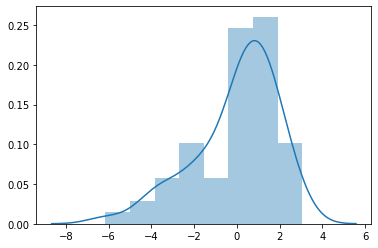

In [37]:
sns.distplot(residual)

In [ ]:
# So distribution plot of residuals are nearly normal distribution and it is centered around zero
# The another method to validate if the residuals are normal distributed is by plotting a PP plot or QQ plot

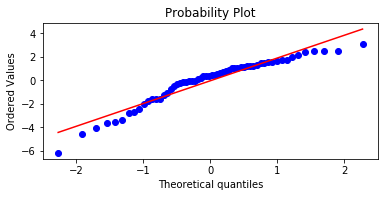

In [43]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [ ]:
# Here probability plot we can see that observed values fall on the same lines(most of the values).
# So this gives us an indication that the overall distribution is near normal.
# If a distribution has to be near normal then the overall mean value of the distribution should also be near
# zero or equal to zero 

In [49]:
np.mean(residual)

-0.038488952534399094

# Homoscedasticity

In [ ]:
# Homoscedasticity or constant variance.This we need to visualize to find out if the overall distribution is
# randomly sampled or does it increase with increase in change of residual values 

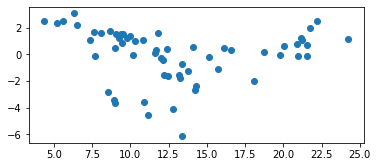

In [45]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ =ax.scatter(y_pred,residual)

In [ ]:
# There is no pattern observed here. 
# The variance is not increasing with repect to the overall y predictions and most of the values are centered
# around the zero value.

# No autocorrelation of residuals

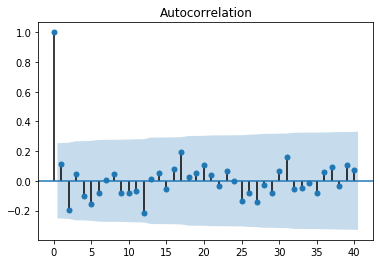

In [48]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

In [ ]:
# The residual with itself will have a high correlation which cannot be avoided.
# Every signal is auto correlated with itself.
# None of the auto correlation values are crossing the threshold of being significant